In [55]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Importing the data from CSV format to Panadas DataFrame.
data = pd.read_csv(r"C:\Users\civil\OneDrive\Desktop\Ekeeda\Extra Learning\Projects\Linear Regression\Excel Data\car data.csv")

In [4]:
# Checking first 10 rows of Dataset
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [9]:
# Getting some information about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Names of different columns of the dataset.
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
# Check for null values.
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
# The shape of the Data (Rows and Columns)
data.shape

(301, 9)

In [28]:
# The Distribution of Categorical Data.
 ##Fuel_Type Distribution
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [31]:
## Transmisssion Distribution
data["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [30]:
## Seller Type Transmission
data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [34]:
## Encoding the Fuel_Type Column
data.replace({"Fuel_Type": {"Petrol":0, "Diesel": 1, "CNG": 2}}, inplace = True)

In [36]:
## Encoding the Seller_Type Column
data.replace({"Seller_Type": {"Dealer": 0, "Individual": 1}}, inplace = True)

In [38]:
## Encoding the Transmission Column
data.replace({"Transmission": {"Manual": 0, "Automatic": 1}}, inplace = True)

In [39]:
## Visualising the data after Encoding
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [45]:
## Seprating Target and Data
X = data.drop(["Car_Name", "Selling_Price"], axis = 1)
Y = data["Selling_Price"]

In [49]:
## Splitting Traing and Test Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

## Model Training

### 1. Linear Regression

In [50]:
lin_reg_model = LinearRegression()

In [51]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

#### Model Evaluation

In [52]:
x_train_prediction = lin_reg_model.predict(x_train)

#### Plotting Actual Prices VS Predicted Values

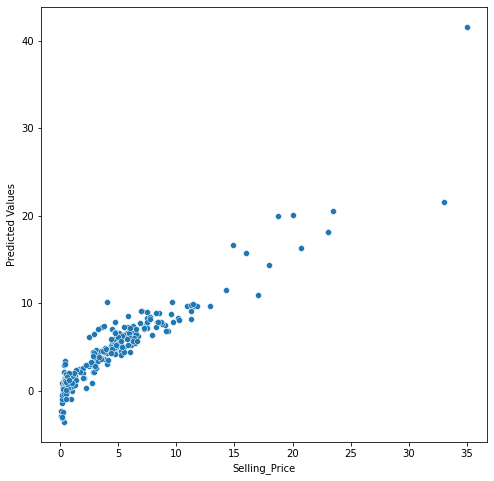

In [64]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x= y_train, y = x_train_prediction)
plt.ylabel("Predicted Values")
plt.show()

In [72]:
## Prediction of Training Data
x_test_prediction = lin_reg_model.predict(x_test)

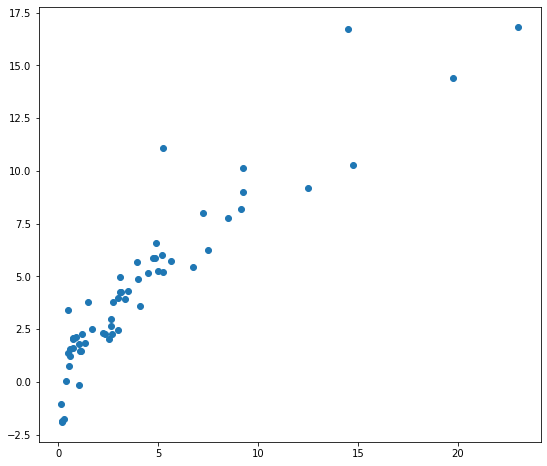

In [73]:
## PLotting Train Predicted Data VS Train Actual Data
plt.figure(figsize = (9, 8))
plt.scatter(x= y_test, y = x_test_prediction)
plt.show()